In [9]:
# cellchat env
library(CellChat)
library(dplyr)
library(Seurat)
library(ggplot2)
library(Cairo)

In [3]:
resultdir<-"/hsfscqjf1/ST_CQ/P23Z32300N0005/hemingmin/bom/10.sc_merged1/results/12_CCI/stage_filter/"
figuredir<-resultdir
setwd(resultdir)


In [4]:
setwd(resultdir)

# cellchat

In [10]:
source("./54_cellchat.r")

# plot all

In [2]:
.libPaths(c(
"/hsfscqjf2/ST_CQ/Reference/software/envs/monocle3/lib/R/library",
"/hsfscqjf2/ST_CQ/Reference/software/envs/cellchat/lib/R/library"))
library(CellChat)
library(dplyr)
library(Cairo)
library(ggplot2)
library(ggalluvial)
library(Seurat)
library(patchwork)
library(cowplot)
options(stringsAsFactors = FALSE)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.1.1 but the current version is
4.2.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:BiocGenerics’:

    intersect


The following object is masked from ‘package:base’:

    intersect



Attaching packa

In [4]:
resultdir<-"/hsfscqjf1/ST_CQ/P24Z32300N0020/hemingmin/bom/10.sc_merged1/results/12_CCI/stage_filter/"
figuredir<-resultdir
setwd(resultdir)

In [174]:
cellchat.stage1 <- readRDS("Stage_1_cellchat.rds")
cellchat.stage2 <- readRDS("Stage_2_cellchat.rds")
cellchat.stage3 <- readRDS("Stage_3_cellchat.rds")
cellchat.stage4 <- readRDS("Stage_4_cellchat.rds")
cellchat.stage5 <- readRDS("Stage_5_cellchat.rds")

cellchat.stage1 <- netAnalysis_computeCentrality(cellchat.stage1, slot.name = "netP")
cellchat.stage2 <- netAnalysis_computeCentrality(cellchat.stage2, slot.name = "netP")
cellchat.stage3 <- netAnalysis_computeCentrality(cellchat.stage3, slot.name = "netP")
cellchat.stage4 <- netAnalysis_computeCentrality(cellchat.stage4, slot.name = "netP")
cellchat.stage5 <- netAnalysis_computeCentrality(cellchat.stage5, slot.name = "netP")


object.list <- list(stage1 = cellchat.stage1, 
                    stage2 = cellchat.stage2,
                   stage3=cellchat.stage3,
                   stage4=cellchat.stage4,
                   stage5=cellchat.stage5)
cellchat <- mergeCellChat(object.list, add.names = names(object.list))
saveRDS(cellchat,file="merge_stage_cellchat.rds")
object.list
save(object.list,file = 'merge_stage_object.list.Rdata')

In [9]:
stage<-c('stage1','stage2','stage3','stage4','stage5')

for (i in seq(1:5)){
    cellchat<-object.list[[i]]
    sample<-names(object.list[i])
# Access all the signaling pathways showing significant communications
# pathways.show.all <- cellchat@netP$pathways
pathways.show.all <- c("FGF","HH")
# check the order of cell identity to set suitable vertex.receiver
levels(cellchat@idents)

for (i in 1:length(pathways.show.all)) {
  # Visualize communication network associated with both signaling pathway and individual L-R pairs
  netVisual(cellchat, signaling = pathways.show.all[i],sources.use = ("Cell_morphogenesis"),out.format = "svg"
            
           )
  # Compute and visualize the contribution of each ligand-receptor pair to the overall signaling pathway
  gg <- netAnalysis_contribution(cellchat, signaling = pathways.show.all[i])
  ggsave(filename=paste0(sample,pathways.show.all[i], "_L-R_contribution.pdf"), plot=gg, width = 3, height = 2, units = 'in', dpi = 300)
}
    }

# plot split

In [6]:
cellchat<-readRDS(file="merge_stage_cellchat.rds")
load(file = 'merge_stage_object.list.Rdata')

In [7]:
pal_stage<-c("stage1"="#52BE80",
                 "stage2"="#5499C7",
                 "stage3"="#F5B041",
                 "stage4"="#AF7AC5",
                 "stage5"="#CD6155")

stage<-c('stage1','stage2','stage3','stage4','stage5')

pal_celltype<-c('#1f77b4',
 '#279e68',
   '#98df8a',
      '#b5bd61',
'#d62728',
'#e377c2',
'#ff9896',
'#f7b6d2',
'#aa40fc',
'#c49c94',
'#ffbb78',
'#ff7f0e',
'#564146')
pal=c("Cell_morphogenesis"='#1f77b4',
  "Epithelial_1"='#279e68',
        "Epithelial_2"='#98df8a',
       "Epithelial_3"='#b5bd61',
"Cuticle_1"='#d62728',
 "Cuticle_2"='#e377c2',
 "Cuticle_3"='#ff9896',
 "Immune"='#f7b6d2',
 "Apoptosis"='#aa40fc',
"Metabolic_process"='#c49c94',
 "Axon_development"='#ffbb78',
 "Ciliated_cell"='#ff7f0e')

In [10]:
width=4
height=4
options(repr.plot.width = width, repr.plot.height=height)
i="stage_1"
object.list[[1]]@netP$pathways
stage_1<-readRDS("Stage_1_cellchat.rds")
p<-netVisual_bubble(stage_1, 
                 color.text=pal,
                 thresh = 0.5,signaling ="NOTCH",
                 sources.use = c("Apoptosis","Cell_morphogenesis"), #
                 targets.use = c("Cell_morphogenesis","Epithelial_1","Cuticle_1"),
                    sort.by.target=F)

pdf(file =paste0(i,"_netVisual_bubble_NOTCH.pdf"),width = width,height = height)
print(p)
dev.off()



[1] "BMP"   "SEMA4" "NOTCH" "PARs"  "FGF"   "HH"

Comparing communications on a single object 




png 
  2

In [20]:
width=6
height=3
options(repr.plot.width = width, repr.plot.height=height)
i="stage_2"
# object.list[[2]]@netP$pathways
stage_2<-readRDS("Stage_2_cellchat.rds")
p<-netVisual_bubble(stage_2, 
                 color.text=pal,
                 thresh = 0.5,signaling ="PARs",
                 sources.use = c("Apoptosis","Immune","Cell_morphogenesis"), #
                 targets.use = c("Apoptosis","Cell_morphogenesis","Epithelial_1","Cuticle_1"),
                    sort.by.target=F)

pdf(file =paste0(i,"_netVisual_bubble_PARs.pdf"),width = width,height = height)
print(p)
dev.off()


Comparing communications on a single object 




png 
  2

In [24]:
width=4
height=3
options(repr.plot.width = width, repr.plot.height=height)
i="stage_3"
# object.list[[2]]@netP$pathways
stage_3<-readRDS("Stage_3_cellchat.rds")
p<-netVisual_bubble(stage_3, 
                 color.text=pal,
                 thresh = 0.5,signaling ="FGF",
                 sources.use = c("Apoptosis","Immune","Cell_morphogenesis"), #
                 targets.use = c("Epithelial_1","Cuticle_1","Cuticle_2"),
                    sort.by.target=F)

pdf(file =paste0(i,"_netVisual_bubble_FGF.pdf"),width = width,height = height)
print(p)
dev.off()


Comparing communications on a single object 




png 
  2

In [29]:
width=4
height=4
options(repr.plot.width = width, repr.plot.height=height)
i="stage_4"
# object.list[[2]]@netP$pathways
stage_4<-readRDS("Stage_4_cellchat.rds")
p<-netVisual_bubble(stage_4, 
                 color.text=pal,
                 thresh = 0.5,signaling =c("WNT","SEMA4"),
                 sources.use = c("Epithelial_2","Epithelial_1"), #
                 targets.use = c("Epithelial_1","Cell_morphogenesis"),
                    sort.by.target=F)

pdf(file =paste0(i,"_netVisual_bubble_Wnt_SEMA4.pdf"),width = width,height = height)
print(p)
dev.off()


Comparing communications on a single object 




png 
  2

In [38]:
width=4
height=3
options(repr.plot.width = width, repr.plot.height=height)
i="stage_5"
# object.list[[2]]@netP$pathways
stage_5<-readRDS("Stage_5_cellchat.rds")
p<-netVisual_bubble(stage_5, 
                 color.text=pal,
                 thresh = 0.5,signaling =c("BMP"),
                 sources.use = c("Axon_development","Cuticle_3"), #
                 targets.use = c("Cuticle_3","Cuticle_2"),
                    sort.by.target=F)

pdf(file =paste0(i,"_netVisual_bubble_BMP.pdf"),width = width,height = height)
print(p)
dev.off()


Comparing communications on a single object 




png 
  2

Comparing communications on a merged object 


Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


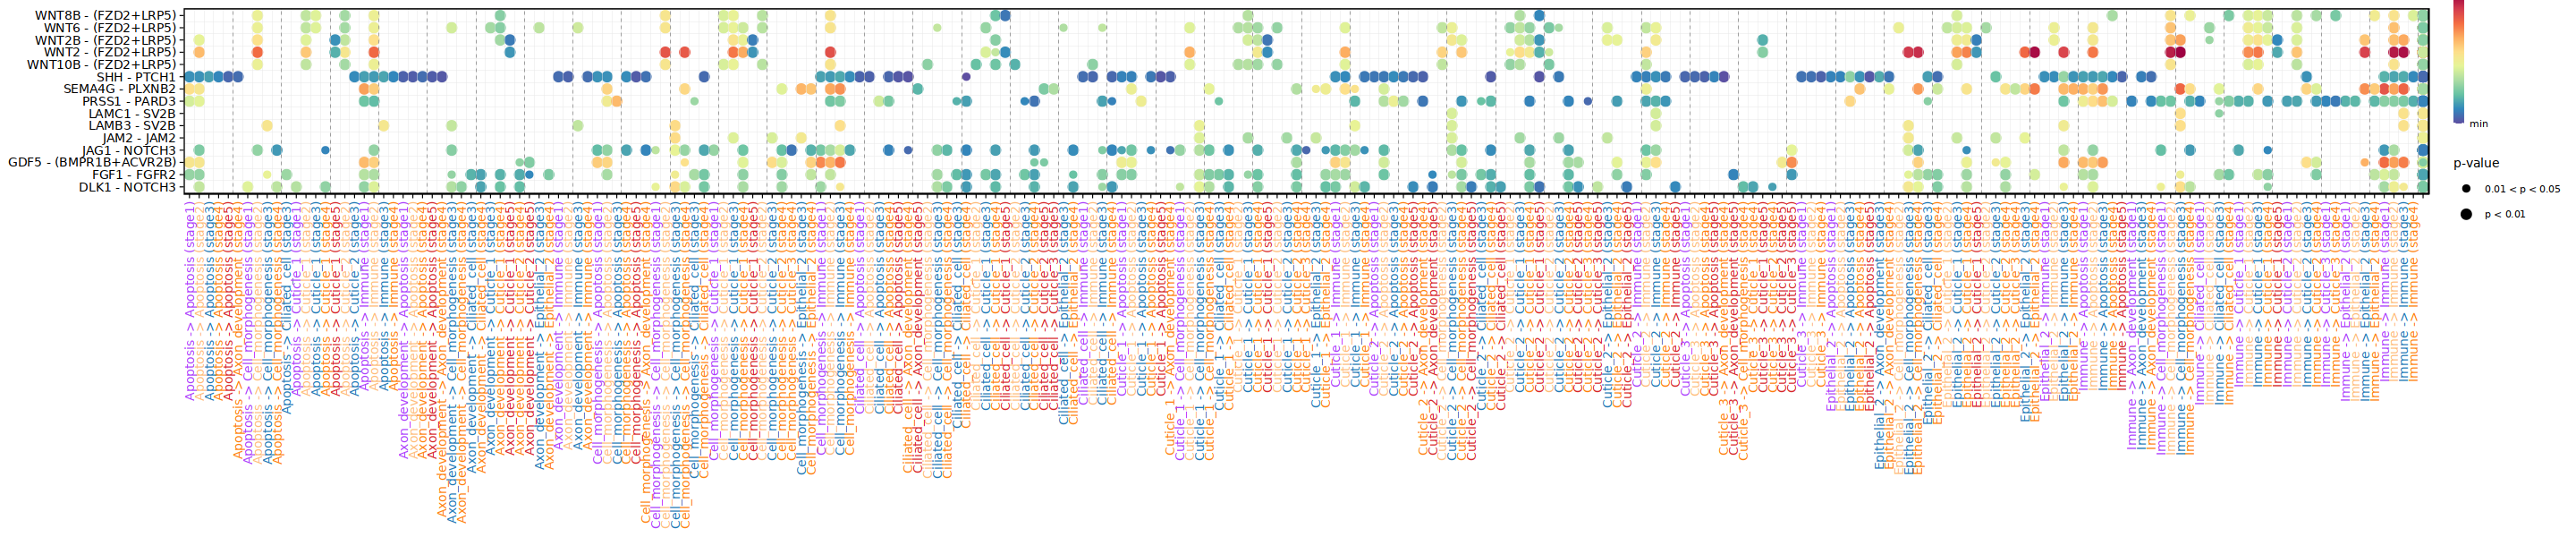

In [84]:
width=24
height=5
options(repr.plot.width = width, repr.plot.height=height)
p<-netVisual_bubble(cellchat, 
                 color.text=pal,
                 thresh = 0.05,
                 # sources.use = c("Cell_morphogenesis"), #
                 # targets.use = c("Epithelial_1", "Epithelial_2","Cuticle_1","Cuticle_2","Cuticle_3","Immune"),
                    sort.by.target=F,
                    comparison = c(1, 2,3,4,5))

# pdf(file ="all_netVisual_bubble.pdf",width = width,height = height)
print(p)
# dev.off()

In [90]:
width=12
height=5
options(repr.plot.width = width, repr.plot.height=height)
for (i in c(1:5)){
p<-netVisual_bubble(cellchat, 
                 color.text=pal,
                 thresh = 0.05,
                 # sources.use = c("Cell_morphogenesis"), #
                 # targets.use = c("Epithelial_1", "Epithelial_2","Cuticle_1","Cuticle_2","Cuticle_3","Immune"),
                    sort.by.target=F,
                    comparison = i)

pdf(file =paste0(i,"_netVisual_bubble.pdf"),width = width,height = height)
print(p)
    dev.off()
    }


Comparing communications on a merged object 


Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Comparing communications on a merged object 


Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Comparing communications on a merged object 


Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Comparing communications on a merged object 


Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Comparing communications on a merged object 


Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in futu

In [167]:
pairLR.use.all<-extractEnrichedLR(cellchat, signaling = pathway.all)

There is no significant communication of WNT

There is no significant communication of PARs

There is no significant communication of LAMININ

There is no significant communication of LAMININ

There is no significant communication of LAMININ

There is no significant communication of LAMININ

There is no significant communication of JAM

There is no significant communication of JAM

There is no significant communication of JAM

There is no significant communication of JAM



In [219]:
width=7
height=5
options(repr.plot.width = width, repr.plot.height=height)

i=1
pairLR.use<-data.frame(interaction_name=c("SHH_PTCH1","JAG1_NOTCH3"))

p1<-netVisual_bubble(cellchat.stage1, 
                 color.text=pal_stage,
                    pairLR.use = pairLR.use,
                 thresh = 0.05,
                    sort.by.target=F)

pdf(file =paste0("stage_",i,"_netVisual_bubble_choose.pdf"),width = width,height = height)
print(p1)
dev.off()

Comparing communications on a single object 




png 
  2

In [220]:
width=10
height=5
options(repr.plot.width = width, repr.plot.height=height)

i=2

pairLR.use<-data.frame(interaction_name=c("WNT2B_FZD2_LRP5","WNT6_FZD2_LRP5","WNT10B_FZD2_LRP5","WNT8B_FZD2_LRP5","WNT2_FZD2_LRP5"))
p2<-netVisual_bubble(cellchat.stage2, 
                    pairLR.use = pairLR.use,
                 thresh = 0.05,
                    sort.by.target=F)

pdf(file =paste0("stage_",i,"_netVisual_bubble_choose.pdf"),width = width,height = height)
print(p2)
dev.off()


Comparing communications on a single object 




png 
  2

In [221]:
width=8
height=5
options(repr.plot.width = width, repr.plot.height=height)

i=3

pairLR.use<-data.frame(interaction_name=c("LAMC1_SV2B","JAM2_JAM2","LAMB3_SV2B"))
p3<-netVisual_bubble(cellchat.stage3, 
                    pairLR.use = pairLR.use,
                 thresh = 0.05,
                    sort.by.target=F)

pdf(file =paste0("stage_",i,"_netVisual_bubble_choose.pdf"),width = width,height = height)
print(p3)
dev.off()


Comparing communications on a single object 




png 
  2

In [222]:
width=18
height=5
options(repr.plot.width = width, repr.plot.height=height)

i=4

pairLR.use<-data.frame(interaction_name=c("WNT2B_FZD2_LRP5","WNT8B_FZD2_LRP5","SHH_PTCH1","DLK1_NOTCH3","SEMA4G_PLXNB2","GDF5_BMPR1B_ACVR2B","JAG1_NOTCH3","FGF1_FGFR2","PRSS1_PARD3"))
p4<-netVisual_bubble(cellchat.stage4, 
                    pairLR.use = pairLR.use,
                 thresh = 0.05,
                    sort.by.target=F)

pdf(file =paste0("stage_",i,"_netVisual_bubble_choose.pdf"),width = width,height = height)
print(p4)
dev.off()


Comparing communications on a single object 




png 
  2

In [223]:
width=6
height=5
options(repr.plot.width = width, repr.plot.height=height)

i=5

pairLR.use<-data.frame(interaction_name=c("WNT2B_FZD2_LRP5","JAG1_NOTCH3"))
p5<-netVisual_bubble(cellchat.stage5, 
                    pairLR.use = pairLR.use,
                 thresh = 0.05,
                    sort.by.target=F)

pdf(file =paste0("stage_",i,"_netVisual_bubble_choose.pdf"),width = width,height = height)
print(p5)
dev.off()


Comparing communications on a single object 




png 
  2

The text on the y-axis will not be colored for the number of compared datasets larger than 3!



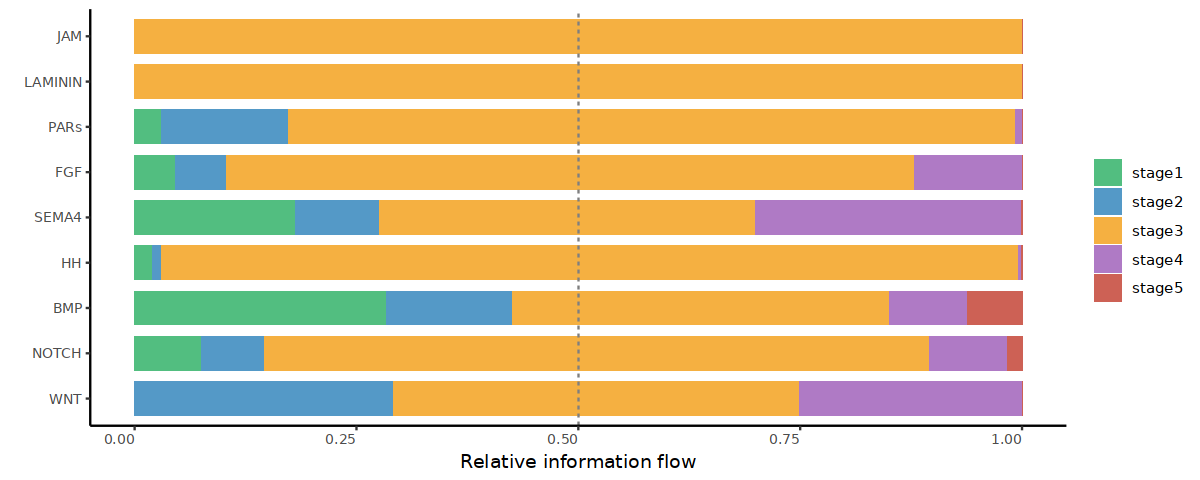

In [19]:
gg3 <- rankNet(cellchat, mode = "comparison", stacked = T,comparison = c(1,2,3,4,5), color.use  = pal_stage,
               do.stat = TRUE)
gg3

In [20]:
# str(cellchat@net)

The text on the y-axis will not be colored for the number of compared datasets larger than 3!



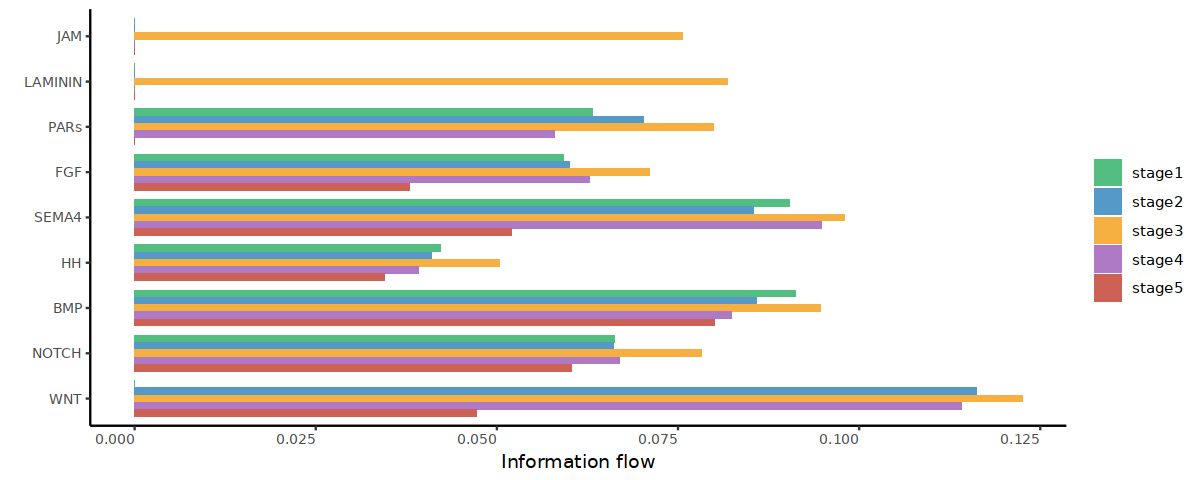

In [21]:
gg4 <- rankNet(cellchat, mode = "comparison", stacked = F,comparison = c(1,2,3,4,5), color.use  = pal_stage,
               do.stat = TRUE)

gg4

In [22]:
width=10
height=4
options(repr.plot.width = width, repr.plot.height=height)
pdf(file = "merged_overall_information_flow.pdf",width = width,height = height)
print(gg3+gg4)
dev.off()

png 
  2

# plot pathways

In [1]:
# cellchat envs
rm(list= ls())

In [2]:
getwd()
setwd("/hsfscqjf1/ST_CQ/P24Z32300N0020/hemingmin/bom/10.sc_merged1/results/12_CCI/stage_filter/")

[1] "/hsfscqjf1/ST_CQ/P24Z32300N0020/hemingmin/bom/10.sc_merged1/results/12_CCI"

In [5]:
# cellchat envs
suppressPackageStartupMessages({library(Cairo)
library(ComplexHeatmap,lib.loc ="/hsfscqjf2/ST_CQ/Reference/software/envs/RTest/lib/R/library")
library(CellChat)
library(ggalluvial)
})

In [12]:
load(file = 'merge_stage_object.list.Rdata')
cellchat<-readRDS(file='merge_stage_cellchat.rds')

In [13]:
pathway.all<-c()
for(i in seq(1,4)){
    pathway.union <- union(object.list[[i]]@netP$pathways, object.list[[5]]@netP$pathways)
    pathway.all<-union(pathway.union,pathway.all)
    # print(pathway.all)
}

pathway.all

[1] "WNT"     "SEMA4"   "BMP"     "NOTCH"   "FGF"     "PARs"    "HH"     
[8] "LAMININ" "JAM"

In [93]:
##pathways gene
pathway.all 

[1] "WNT"     "SEMA4"   "BMP"     "NOTCH"   "FGF"     "PARs"    "HH"     
[8] "LAMININ" "JAM"

In [26]:
for (i in pathway.all){
    
p1<-plotGeneExpression(cellchat, signaling = i, enriched.only = TRUE,
                       type = "violin",
                       color.use=pal_celltype,
                       raster=FALSE)
# print(p1)
ggsave(p1,file =paste0(i,"_signaling pathways_genes.pdf"),width = 8,height = 8)

}



There is no significant communication of WNT

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, whi

In [9]:
pal=c("Cell_morphogenesis"='#1f77b4',
  "Epithelial_1"='#279e68',
        "Epithelial_2"='#98df8a',
       "Epithelial_3"='#b5bd61',
"Cuticle_1"='#d62728',
 "Cuticle_2"='#e377c2',
 "Cuticle_3"='#ff9896',
 "Immune"='#f7b6d2',
 "Apoptosis"='#aa40fc',
"Metabolic_process"='#c49c94',
 "Axon_development"='#ffbb78',
 "Ciliated_cell"='#ff7f0e')
pal_celltype<-c('#1f77b4',
 '#279e68',
   '#98df8a',
      '#b5bd61',
'#d62728',
'#e377c2',
'#ff9896',
'#f7b6d2',
'#aa40fc',
'#c49c94',
'#ffbb78',
'#ff7f0e')

In [11]:
ht<-list()

In [12]:
i=1
pal=c( "Apoptosis"='#aa40fc',
      "Axon_development"='#ffbb78',
    "Cell_morphogenesis"='#1f77b4',
       "Ciliated_cell"='#ff7f0e',
  
"Cuticle_1"='#d62728',
 "Cuticle_2"='#e377c2',
 "Cuticle_3"='#ff9896',
      "Epithelial_1"='#279e68',
        "Epithelial_2"='#98df8a',
       # "Epithelial_3"='#b5bd61',
 "Immune"='#f7b6d2',
"Metabolic_process"='#c49c94'
     )
# combining all the identified signaling pathways from different datasets 

ht[[i]] = netAnalysis_signalingRole_heatmap(object.list[[i]], pattern = "all", 
                                            color.use =pal,
signaling = pathway.union, title = names(object.list)[i], width = 5, height = 6)


i=5
# combining all the identified signaling pathways from different datasets 

ht[[i]] = netAnalysis_signalingRole_heatmap(object.list[[i]], pattern = "all", 
                                            color.use =pal,
signaling = pathway.union, title = names(object.list)[i], width = 5, height = 6)



In [13]:
i=2
pal=c( "Apoptosis"='#aa40fc',
      "Axon_development"='#ffbb78',
    "Cell_morphogenesis"='#1f77b4',
       "Ciliated_cell"='#ff7f0e',
  
"Cuticle_1"='#d62728',
 "Cuticle_2"='#e377c2',
 "Cuticle_3"='#ff9896',
      "Epithelial_1"='#279e68',
        "Epithelial_2"='#98df8a',
       "Epithelial_3"='#b5bd61',
 "Immune"='#f7b6d2',
"Metabolic_process"='#c49c94'
     )
# combining all the identified signaling pathways from different datasets 

ht[[i]] = netAnalysis_signalingRole_heatmap(object.list[[i]], pattern = "all", 
                                            color.use =pal,
signaling = pathway.union, title = names(object.list)[i], width = 5, height = 6)


i=3
# combining all the identified signaling pathways from different datasets 

ht[[i]] = netAnalysis_signalingRole_heatmap(object.list[[i]], pattern = "all", 
                                            color.use =pal,
signaling = pathway.union, title = names(object.list)[i], width = 5, height = 6)

i=4
# combining all the identified signaling pathways from different datasets 

ht[[i]] = netAnalysis_signalingRole_heatmap(object.list[[i]], pattern = "all", 
                                            color.use =pal,
signaling = pathway.union, title = names(object.list)[i], width = 5, height = 6)


In [ ]:
ht<-list()
for(i in seq(1,5)){
    print(i)
# combining all the identified signaling pathways from different datasets 
ht[[i]] = netAnalysis_signalingRole_heatmap(object.list[[i]], pattern = "incoming", signaling = pathway.union, title = names(object.list)[i], width = 5, height = 6)
}

width=14
height=5
options(repr.plot.width = width, repr.plot.height=height)
pdf(file ="merged_diff_signaling pathways_incoming.pdf",width = width,height = height)
draw(ht[[1]] + ht[[2]] + ht[[3]] + ht[[4]]+ ht[[5]],ht_gap = unit(0.5, "cm"))
dev.off()

In [11]:
ht<-list()
for(i in seq(1,5)){
    print(i)
# combining all the identified signaling pathways from different datasets 
ht[[i]] = netAnalysis_signalingRole_heatmap(object.list[[i]], pattern = "outgoing", signaling = pathway.union, title = names(object.list)[i], width = 5, height = 6)
}

width=14
height=5
options(repr.plot.width = width, repr.plot.height=height)
pdf(file ="merged_diff_signaling pathways_outgoing.pdf",width = width,height = height)
draw(ht[[1]] + ht[[2]] + ht[[3]] + ht[[4]]+ ht[[5]],ht_gap = unit(0.5, "cm"))
dev.off()

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5


Warning message:
“Heatmap/annotation names are duplicated: Relative strength”
Warning message:
“Heatmap/annotation names are duplicated: Relative strength, Relative
strength”
Warning message:
“Heatmap/annotation names are duplicated: Relative strength, Relative
strength, Relative strength”
Warning message:
“Heatmap/annotation names are duplicated: Relative strength, Relative
strength, Relative strength, Relative strength”


png 
  2

In [20]:

width=12
height=5
options(repr.plot.width = width, repr.plot.height=height)
p<-netVisual_bubble(cellchat, 
                 color.text=pal,
                 thresh = 0.05,
                 sources.use = c("Cell_morphogenesis"), #
                 targets.use = c("Epithelial_1", "Epithelial_2","Cuticle_1","Cuticle_2","Cuticle_3","Immune"),
                    sort.by.target=TRUE,
                    comparison = c(1, 2,3,4,5))

pdf(file ="merged_netVisual_bubble_cm.pdf",width = width,height = height)
print(p)
dev.off()


Comparing communications on a merged object 


Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


png 
  2

In [21]:

width=12
height=5
options(repr.plot.width = width, repr.plot.height=height)
p<-netVisual_bubble(cellchat, 
                 color.text=pal,
                 thresh = 0.05,
                 sources.use = c("Immune"), #
                 targets.use = c("Epithelial_1", "Epithelial_2","Cuticle_1","Cuticle_2","Cuticle_3","Cell_morphogenesis"),
                    sort.by.target=TRUE,
                    comparison = c(1, 2,3,4,5))

pdf(file ="merged_netVisual_bubble_immune.pdf",width = width,height = height)
print(p)
dev.off()


Comparing communications on a merged object 


Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


png 
  2

stage sig cluster




# sigaling cluster

In [24]:
gg1 = rankNet(cellchat,slot.name = "netP",measure="weight",comparison = c(1,2,3,4,5),mode = "comparison", stacked = T, do.stat = T,show.raw = F,return.data=T,cutoff.pvalue = 0.1,thresh=0.1)
df1 = gg1$signaling.contribution

The text on the y-axis will not be colored for the number of compared datasets larger than 3!



In [27]:
library(zoo)
library(reshape2)
library(ComplexHeatmap)
library(NMF)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: registry

Loading required package: rngtools

Loading required package: cluster

NMF - BioConductor layer [NO: missing Biobase] | Shared memory capabilities [NO: bigmemory] | Cores 2/2

  To enable the Bioconductor layer, try: install.extras('
NMF
') [with Bioconductor repository enabled]
  To enable shared memory capabilities, try: install.extras('
NMF
')


Attaching package: ‘NMF’


The following objects are masked from ‘package:igraph’:

    algorithm, compare




In [29]:
wide_df <- dcast(df1, name ~ group, value.var = "contribution.scaled")
rownames(wide_df) = wide_df$name
wide_df =wide_df[,-1]
wide_df = wide_df[,c("stage1","stage2","stage3","stage4","stage5")]

In [32]:
wide_df = t(wide_df)

In [33]:
data_receiver = sweep(wide_df, 2L, apply(wide_df, 2, function(x) max(x, na.rm = TRUE)), '/', check.margin = FALSE)
data0 = as.matrix(data_receiver)

In [35]:
options(warn = -1)
data <- data0
data <- data[rowSums(data)!=0,]

In [37]:
k.range = seq(2,10)
# k.range =2
nrun = 30
seed.use = 10
res <- NMF::nmfEstimateRank(data, range = k.range, method = 'lee', nrun=nrun, seed = seed.use)

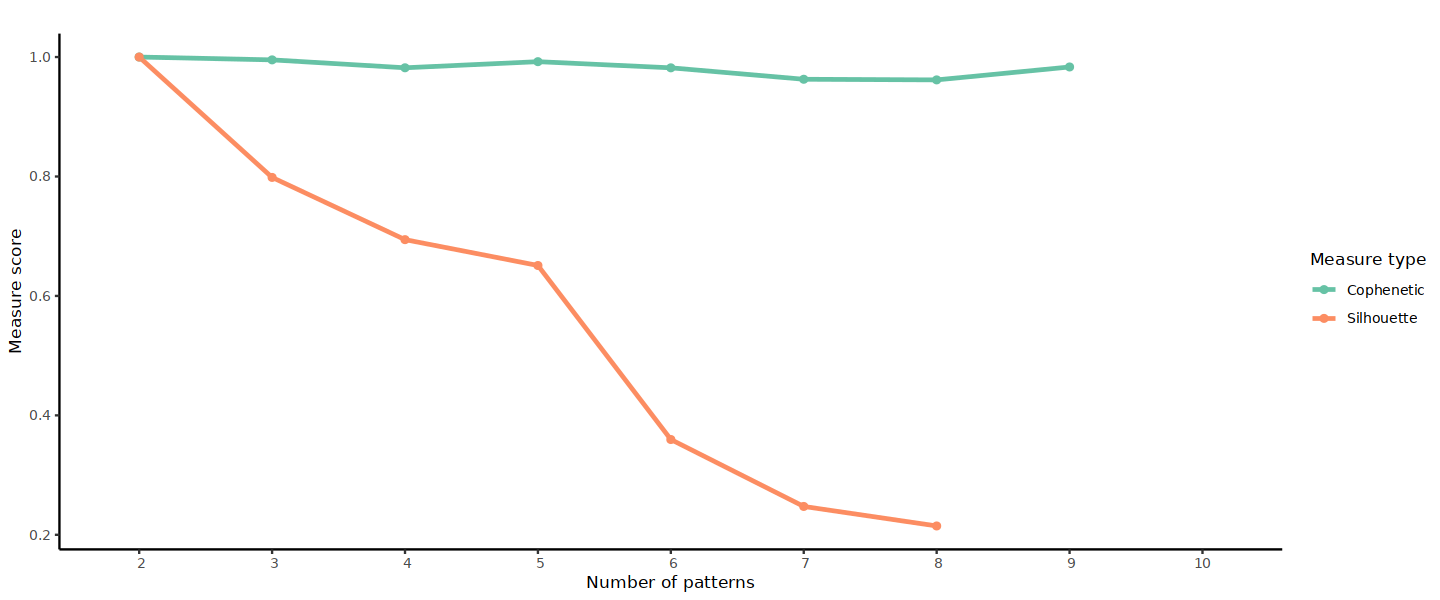

In [38]:
df1 <- data.frame(k = res$measures$rank, score = res$measures$cophenetic, Measure = "Cophenetic")
df2 <- data.frame(k = res$measures$rank, score = res$measures$silhouette.consensus, Measure = "Silhouette")
# df3 <- data.frame(k = res$measures$rank, score = res$measures$dispersion, Measure = "Dispersion")
df <- rbind(df1, df2)
# df <- rbind(df1, df2)
#df <- rbind(df1, df2, df3)
gg <- ggplot(df, aes(x = k, y = score, group = Measure, color = Measure)) + geom_line(size=1) +
geom_point() +
theme_classic() + labs(x = 'Number of patterns', y='Measure score') +
labs(title = "") +  theme(plot.title = element_text(size = 10, face = "bold", hjust = 0.5)) +
theme(legend.position = "right") + theme(text = element_text(size = 10)) + scale_x_discrete(limits = (unique(df$k))) +
scale_color_brewer(palette="Set2") + guides(color=guide_legend("Measure type"))
do.facet<-"F"
if (do.facet) {
gg <- gg + facet_wrap(~ Measure, scales='free')
}
return(gg)

In [39]:
outs_NMF <- NMF::nmf(data, rank = 3, method = 'lee', seed = 'nndsvd')

In [40]:
# str(outs_NMF)

In [41]:
W <- scaleMat(outs_NMF@fit@W, 'r1')
H <- scaleMat(outs_NMF@fit@H, 'c1')

In [44]:
colnames(W) <- paste0("Pattern ", seq(1,ncol(W))); rownames(H) <- paste0("Pattern ", seq(1,nrow(H)));

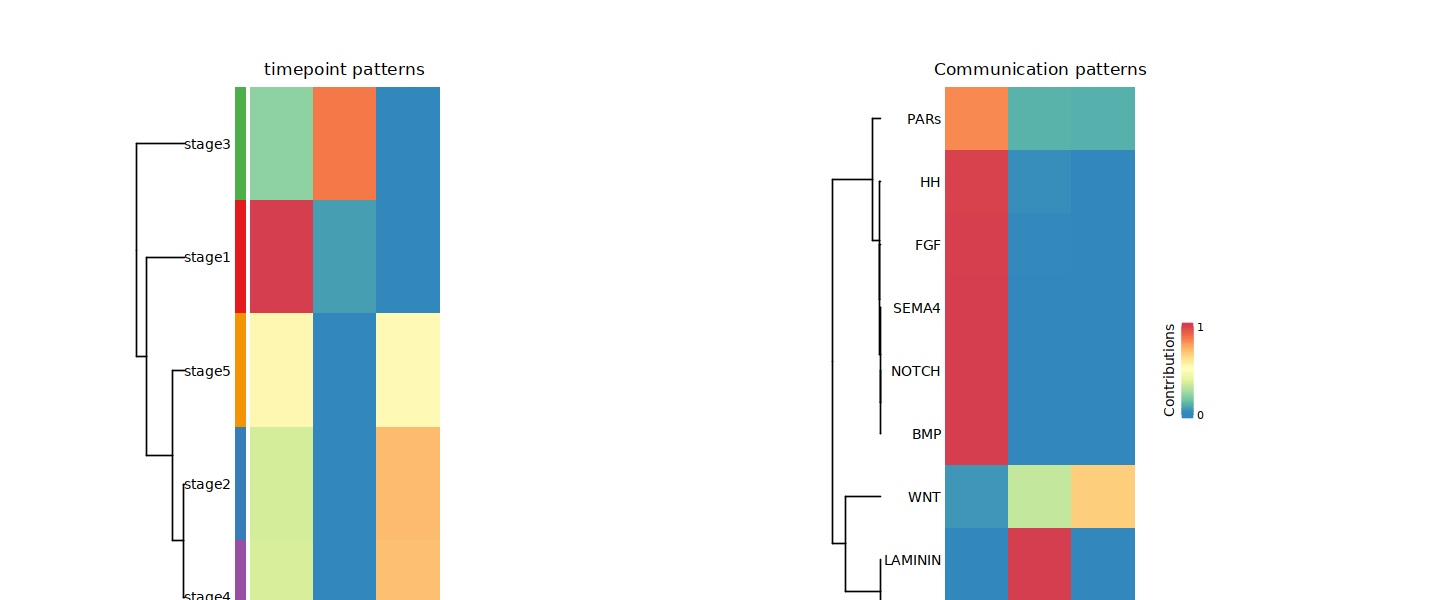

In [45]:
heatmap.show = TRUE
color.use = NULL
color.heatmap = "Spectral"
title.legend = "Contributions"
width = 4
height = 12
font.size = 8
if (heatmap.show) {
net <- W
if (is.null(color.use)) {
  color.use <- scPalette(length(rownames(net)))
}
color.heatmap = grDevices::colorRampPalette(rev(RColorBrewer::brewer.pal(n = 9, name = color.heatmap)))(255)

df<- data.frame(group = rownames(net)); rownames(df) <- rownames(net)
cell.cols.assigned <- setNames(color.use, unique(as.character(df$group)))
row_annotation <- HeatmapAnnotation(df = df, col = list(group = cell.cols.assigned),which = "row",
                                    show_legend = FALSE, show_annotation_name = FALSE,
                                    simple_anno_size = grid::unit(0.2, "cm"))

ht1 = Heatmap(net, col = color.heatmap, na_col = "white", name = "Contribution",
              left_annotation = row_annotation,
              cluster_rows = T,cluster_columns = F,clustering_method_rows = "average",
              row_names_side = "left",row_names_rot = 0,row_names_gp = gpar(fontsize = font.size),column_names_gp = gpar(fontsize = font.size),
              width = unit(width, "cm"), height = unit(height, "cm"),
              show_heatmap_legend = F,
              column_title = "timepoint patterns",column_title_gp = gpar(fontsize = 10)
)


net <- t(H)

ht2 = Heatmap(net, col = color.heatmap, na_col = "white", name = "Contribution",
              cluster_rows = T,cluster_columns = F,clustering_method_rows = "average",
              row_names_side = "left",row_names_rot = 0,row_names_gp = gpar(fontsize = font.size),column_names_gp = gpar(fontsize = font.size),
              width = unit(width, "cm"), height = unit(height, "cm"),
              column_title = "Communication patterns",column_title_gp = gpar(fontsize = 10),
              heatmap_legend_param = list(title = title.legend, title_gp = gpar(fontsize = 8, fontface = "plain"),title_position = "leftcenter-rot",
                                          border = NA, at = c(round(min(net, na.rm = T), digits = 1), round(max(net, na.rm = T), digits = 1)),
                                          legend_height = unit(20, "mm"),labels_gp = gpar(fontsize = 6),grid_width = unit(2, "mm"))
)

gb_ht1 = grid.grabExpr(draw(ht1))
gb_ht2 = grid.grabExpr(draw(ht2))
#grid.newpage()
pushViewport(viewport(x = 0.1, y = 0.1, width = 0.2, height = 0.5, just = c("left", "bottom")))
grid.draw(gb_ht1)
popViewport()

pushViewport(viewport(x = 0.6, y = 0.1, width = 0.2, height = 0.5, just = c("left", "bottom")))
grid.draw(gb_ht2)
popViewport()

}

data_W <- as.data.frame(as.table(W)); colnames(data_W) <- c("CellGroup","Pattern","Contribution")
data_H <- as.data.frame(as.table(H)); colnames(data_H) <- c("Pattern","Signaling","Contribution")

res.pattern = list("cell" = data_W, "signaling" = data_H)
results<- list(data = data0, pattern = res.pattern)



In [46]:

pdf("bombyx_stage.pdf",width =8,height = 6)
pushViewport(viewport(x = 0.1, y = 0.1, width = 0.2, height = 0.8, just = c("left", "bottom")))
grid.draw(gb_ht1)
popViewport()

pushViewport(viewport(x = 0.6, y = 0.1, width = 0.2, height = 0.8, just = c("left", "bottom")))
grid.draw(gb_ht2)
popViewport()

dev.off()

png 
  2

In [47]:
pdf("cci_stage_heatmap.pdf",width =4,height = 3)
pheatmap(t(wide_df),
         # annotation=group,
         # main = "The Pretty Heatmaps by myself",
         cluster_rows = T,
         cluster_cols = T,
         # color = colorRampPalette(c(norcol, "white", concol))(50),
         show_colnames = T,
         scale="row",  
         #border_color ="NA",
         # display_numbers = TRUE, 
         #cellwidth = 15, cellheight = 12,
         fontsize = 12,
         fontsize_row=10,
         fontsize_col=10)
dev.off()

png 
  2

# L-R cluster

In [95]:
p11 = netVisual_bubble(cellchat,font.size=12,comparison = c(1, 2,3,4,5), angle.x = 90, return.data=TRUE)
df_LR = p11$communication
df_LR$group = as.factor(df_LR$dataset)
df_LR = df_LR[,c("prob","interaction_name_2","group")]

Comparing communications on a merged object 


Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


In [51]:
wide_df_LR <- dcast(df_LR, interaction_name_2 ~ group, value.var = "prob")
rownames(wide_df_LR) = wide_df_LR$interaction_name_2
wide_df_LR =wide_df_LR[,-1]
wide_df_LR = wide_df_LR[,c("stage1","stage2","stage3","stage4","stage5")]

Aggregation function missing: defaulting to length



In [52]:
wide_df_LR[is.na(wide_df_LR)] = 0

In [53]:
pdf("cci_stage_LR_heatmap.pdf",width =6,height = 3)
pheatmap(wide_df_LR[,c("stage1","stage2","stage3","stage4","stage5")],
         # annotation=group,
         # main = "The Pretty Heatmaps by myself",
         cluster_rows = T,
         cluster_cols = F,
         # color = colorRampPalette(c(norcol, "white", concol))(50),
         show_colnames = T,
         show_rownames = T,
         scale="row",  
         #border_color ="NA",
         # display_numbers = TRUE, 
         #cellwidth = 15, cellheight = 12,
         # display_numbers =TRUE,
         fontsize = 12,
         fontsize_row=10,
         fontsize_col=10)
dev.off()

png 
  2

# Chord diagram

In [25]:
getwd()

[1] "/hsfscqjf1/ST_CQ/P23Z32300N0005/hemingmin/bom/10.sc_merged1/results/12_CCI/stage_filter"

In [24]:
cellchat.stage1 <- readRDS("Stage_1_cellchat.rds")
cellchat.stage2 <- readRDS("Stage_2_cellchat.rds")
cellchat.stage3 <- readRDS("Stage_3_cellchat.rds")
cellchat.stage4 <- readRDS("Stage_4_cellchat.rds")
cellchat.stage5 <- readRDS("Stage_5_cellchat.rds")

cellchat.stage1 <- netAnalysis_computeCentrality(cellchat.stage1, slot.name = "netP")
cellchat.stage2 <- netAnalysis_computeCentrality(cellchat.stage2, slot.name = "netP")
cellchat.stage3 <- netAnalysis_computeCentrality(cellchat.stage3, slot.name = "netP")
cellchat.stage4 <- netAnalysis_computeCentrality(cellchat.stage4, slot.name = "netP")
cellchat.stage5 <- netAnalysis_computeCentrality(cellchat.stage5, slot.name = "netP")


In [95]:
#stage1
filename="stage1"
obj<-cellchat.stage1
width=7
height=5
options(repr.plot.width = width, repr.plot.height=height)

pathway.show<-(obj@netP$pathways)
pathway.show


# par(mfrow=c(1,1))
pathway.show<-c('BMP','SEMA4','NOTCH','FGF')
pdf(paste0(filename,"_pathways_cci.pdf"),width =width,height = height )
for( paths in pathway.show){
p1<-netVisual_aggregate(obj, signaling = paths, 
                    thresh = 0.01,
                    color.use =pal,
                    vertex.label.cex=0.5,
                    show.legend =F,
                    small.gap = 2,
                    layout = "chord")
}

p2<-netVisual_aggregate(obj, signaling = "HH", 
                    thresh = 0.01,
                    color.use =pal,
                    vertex.label.cex=0.1,
                    show.legend =F,
                    small.gap = 2,
                    layout = "chord")
p3<-netVisual_aggregate(obj, signaling = "PARs", 
                    thresh = 0.01,
                    color.use =pal,
                    vertex.label.cex=0.1,
                    show.legend =F,
                    small.gap = 2,
                    layout = "chord")

dev.off()

[1] "BMP"   "SEMA4" "NOTCH" "PARs"  "FGF"   "HH"

png 
  2

In [88]:
#stage2
filename="stage2"
obj<-cellchat.stage2
width=7
height=5
options(repr.plot.width = width, repr.plot.height=height)

pathway.show<-(obj@netP$pathways)
pathway.show


par(mfrow=c(1,1))
pdf(paste0(filename,"_pathways_cci.pdf"),width =width,height = height )
for( paths in pathway.show){
p1<-netVisual_aggregate(obj, signaling = paths, 
                    thresh = 0.01,
                    color.use =pal,
                    vertex.label.cex=0.5,
                    show.legend =F,
                    small.gap = 2,
                    layout = "chord")
}


dev.off()

[1] "WNT"   "BMP"   "SEMA4" "PARs"  "NOTCH" "FGF"   "HH"

png 
  2

In [89]:
#stage3
filename="stage3"
obj<-cellchat.stage3
width=7
height=5
options(repr.plot.width = width, repr.plot.height=height)

pathway.show<-(obj@netP$pathways)
pathway.show


par(mfrow=c(1,1))
pdf(paste0(filename,"_pathways_cci.pdf"),width =width,height = height )
for( paths in pathway.show){
p1<-netVisual_aggregate(obj, signaling = paths, 
                    thresh = 0.01,
                    color.use =pal,
                    vertex.label.cex=0.5,
                    show.legend =F,
                    small.gap = 2,
                    layout = "chord")
}


dev.off()

[1] "WNT"     "SEMA4"   "BMP"     "LAMININ" "PARs"    "NOTCH"   "JAM"    
[8] "FGF"     "HH"

png 
  2

In [93]:
#stage4
filename="stage4"
obj<-cellchat.stage4
width=7
height=5
options(repr.plot.width = width, repr.plot.height=height)

pathway.show<-(obj@netP$pathways)
pathway.show


par(mfrow=c(1,1))
pdf(paste0(filename,"_pathways_cci.pdf"),width =width,height = height )
for( paths in pathway.show){
p1<-netVisual_aggregate(obj, signaling = paths, 
                    thresh = 0.01,
                    color.use =pal,
                    vertex.label.cex=0.1,
                    show.legend =F,
                    small.gap = 2,
                    layout = "chord")
}


dev.off()

[1] "WNT"   "SEMA4" "BMP"   "NOTCH" "FGF"   "PARs"  "HH"

png 
  2

In [91]:
#stage5
filename="stage5"
obj<-cellchat.stage5
width=7
height=5
options(repr.plot.width = width, repr.plot.height=height)

pathway.show<-(obj@netP$pathways)
pathway.show


par(mfrow=c(1,1))
pdf(paste0(filename,"_pathways_cci.pdf"),width =width,height = height )
for( paths in pathway.show){
p1<-netVisual_aggregate(obj, signaling = paths, 
                    thresh = 0.01,
                    color.use =pal,
                    vertex.label.cex=0.5,
                    show.legend =F,
                    small.gap = 2,
                    layout = "chord")
}


dev.off()

[1] "BMP"   "NOTCH" "SEMA4" "WNT"   "FGF"   "HH"

png 
  2